### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

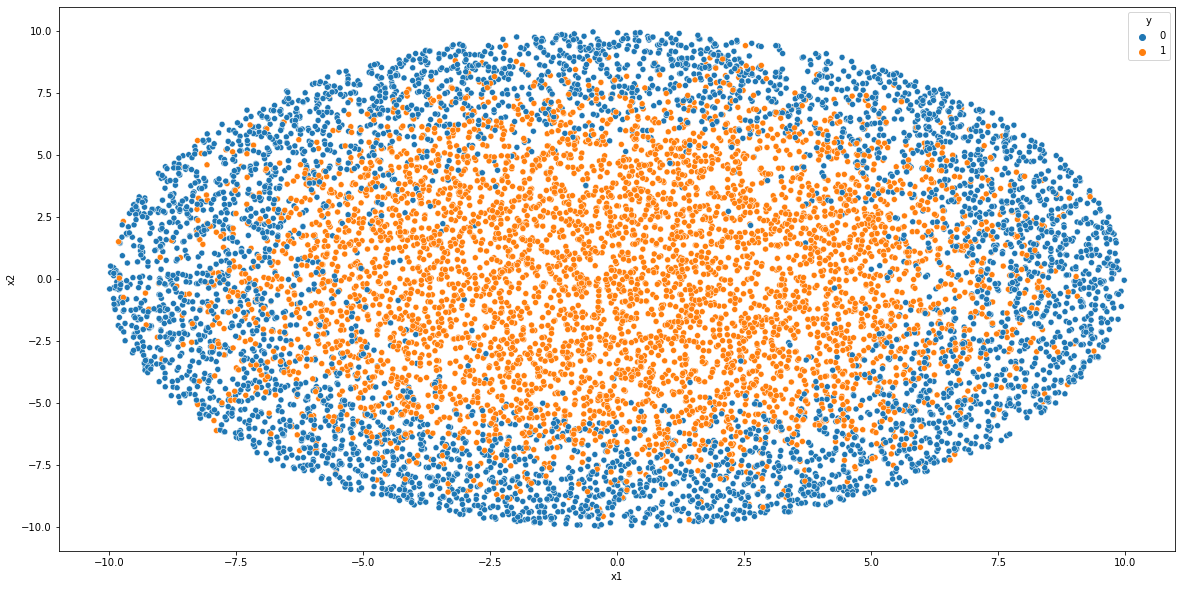

In [104]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

In [125]:
# Идеальная модель маловероятна, поскольку данные нелинейны и есть достаточно много выбросов
# попытка обучить модель на все выбросы тестовой выборки приведет к ее переобучению
# Поскольку модель нелинейна на ней будут плохо работать линейные алгоритмы (линейная регрессия, логистическая регрессия и тп)
# нужно выбирать нелинейные классификаторы и алгоритмы: DBSCAN, леса и джунгли решающих деревьев и нейронные сети

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [106]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

In [141]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии

logreg = LogisticRegression( )
logreg.fit(X_train, y_train)

predict_logit =  logreg.predict(X_test)
predict_log_proba = logreg.predict_proba(X_test)

g=[0]*len(predict_log_proba)
for i in range(len(predict_log_proba)):
    g[i] = np.argmax(predict_log_proba[i])
    

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')


Точность нашей модели 0.6096969696969697


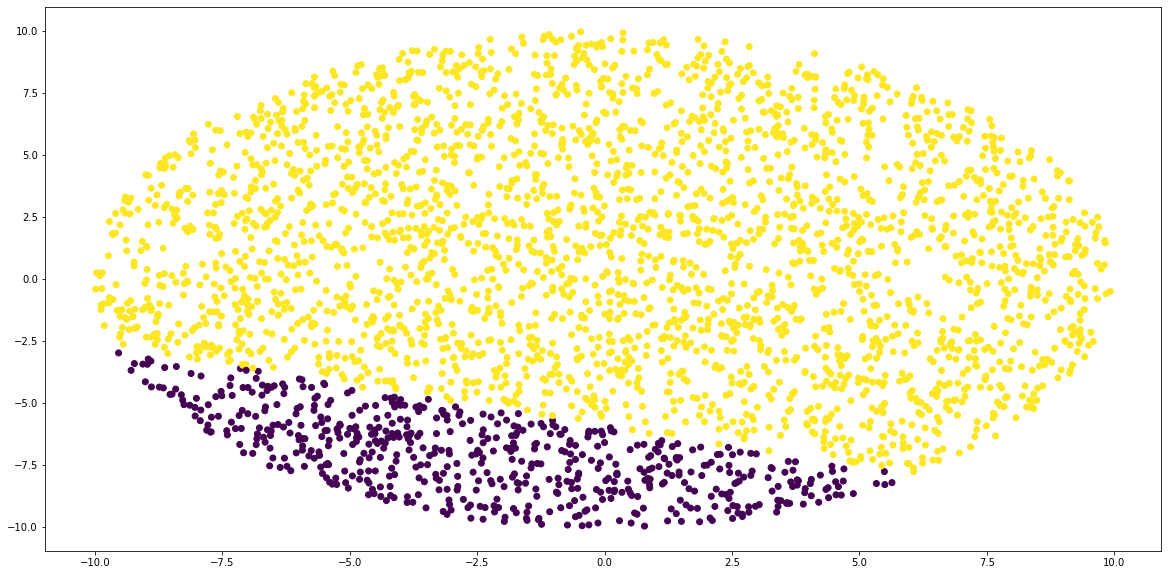

In [142]:
# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = g)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

In [143]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

3295
3405


In [144]:
# классы сбалансированы

In [145]:
# я бы добавил полиномиальное преобразование признаков
# но поскольку предложена только одна фича сначала поэкспериментируем с разными полиномами

Точность нашей модели 0.7157575757575757


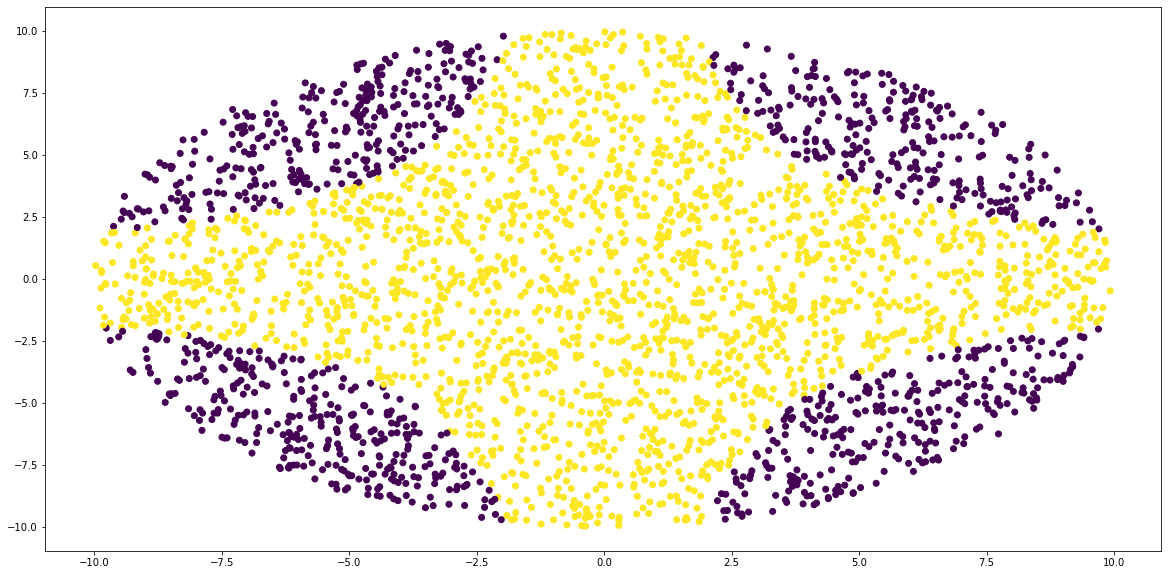

In [177]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

# df_new['new_feature_1'] = (df_new['x1'])*(df_new['x2'])

df_new['new_feature_1'] = (df_new['x1']**2)*(df_new['x2']**2)

# df_new['new_feature_1'] = np.logical_xor(df_new['x1'] > 0, df_new['x2'] > 0)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

logreg = LogisticRegression( )
logreg.fit(X_train_new, y_train_new)

predict_logit =  logreg.predict(X_test_new)
predict_log_proba = logreg.predict_proba(X_test_new)

g=[0]*len(predict_log_proba)
for i in range(len(predict_log_proba)):
    g[i] = np.argmax(predict_log_proba[i])

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = g)
plt.show()

In [178]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
df_new = df_new.drop(columns=["new_feature_1","y"])
df_new = poly.fit_transform(df_new)

In [181]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new,
                                                                    df['y'], test_size = 0.33)

logreg = LogisticRegression( )
logreg.fit(X_train_new, y_train_new)

predict_logit =  logreg.predict(X_test_new)
predict_log_proba = logreg.predict_proba(X_test_new)

g=[0]*len(predict_log_proba)
for i in range(len(predict_log_proba)):
    g[i] = np.argmax(predict_log_proba[i])

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

Точность нашей модели 0.8412121212121212


Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.7706060606060606


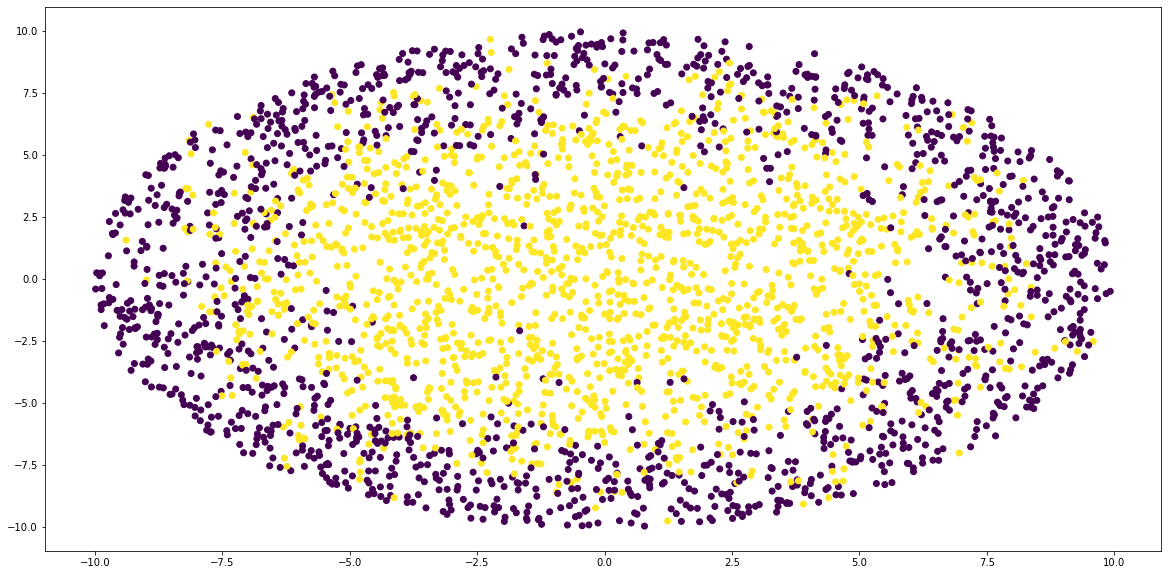

In [110]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X_train, y_train)

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)


g=[0]*len(predict_tree_proba)
for i in range(len(predict_tree_proba)):
    g[i] = np.argmax(predict_tree_proba[i])
#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = g)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8136363636363636


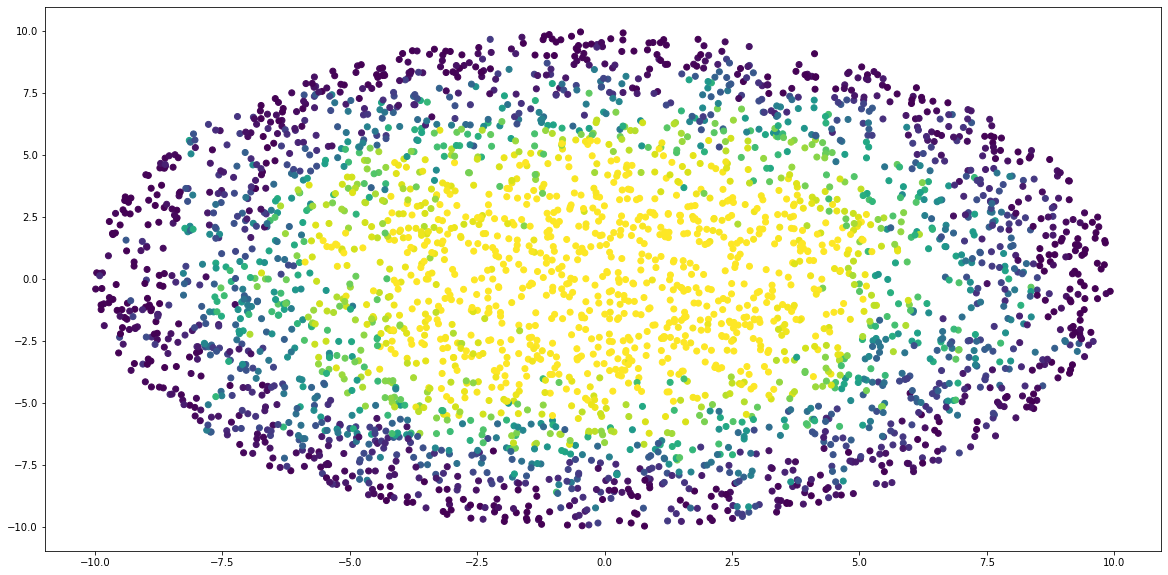

In [111]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)

predict_forest = model.predict(X_test)
# Вероятности для каждого класса
predict_forest_proba = model.predict_proba(X_test)[:, 1]

print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [112]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

2.9.1
2.9.0


In [113]:
from tensorflow.keras import layers as L         # Уже готовые слои для моделей
from tensorflow.keras.models import Sequential   # Специальный класс для склеивания слоёв
from tensorflow.keras.models import Model        # Альтернативный класс для склейки слоёв
import tensorflow.keras.optimizers as opt        # Разные оптимизационные алгоритмы :3 

In [114]:
from tensorflow.keras.metrics import Accuracy

def get_new_model( ):
    acc = Accuracy()

    ###########################################################
    # Ваш код! 
    model = Sequential(name = 'Dmitry')  # модели можно дать имя!
    
    # Добавляем в нашу модель первый слой из 25 нейронов
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))

    # Добавляем функцию активации на первый слой 
    model.add(L.Activation('sigmoid'))

    # Добавляем ещё один слой из 25 нейронов
    model.add(L.Dense(5, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    # На выходе мы должны получить вероятности того, что объект относится к разным классам 
    # Сделать такое преобразование позволяет softmax как функция активации
    # На выход будет идти 4 вероятности по числу классов
    model.add(L.Dense(2, activation='softmax', kernel_initializer = 'random_normal'))
    
    ###########################################################
    
    # В качестве оптимизации будем использовать Adam
    # Это такой специальный градиентный спуск, обсудим его в следущий раз
    optimizer = opt.Adam(learning_rate=1e-3)

    # Собираем модель
    model.compile(loss = 'categorical_crossentropy', 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

In [115]:
model = get_new_model( )

In [116]:
model.summary()

Model: "Dmitry"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 15        
                                                                 
 activation_8 (Activation)   (None, 5)                 0         
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 activation_9 (Activation)   (None, 5)                 0         
                                                                 
 dense_14 (Dense)            (None, 2)                 12        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [117]:
df["y"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Name: y, Length: 10000, dtype: int64

In [118]:
from tensorflow.keras.utils import to_categorical
to_categorical(df["y"])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [120]:
# Попробуйте переключить verbose = 1 и будет чудо!
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.2, epochs=30, verbose=1)

Epoch 1/30
168/168 [==============================] - 0s 1ms/step - loss: 0.3897 - acc: 0.8341 - val_loss: 0.3839 - val_acc: 0.8291
Epoch 2/30
168/168 [==============================] - 0s 873us/step - loss: 0.3858 - acc: 0.8334 - val_loss: 0.3833 - val_acc: 0.8328
Epoch 3/30
168/168 [==============================] - 0s 908us/step - loss: 0.3832 - acc: 0.8358 - val_loss: 0.3792 - val_acc: 0.8291
Epoch 4/30
168/168 [==============================] - 0s 889us/step - loss: 0.3810 - acc: 0.8332 - val_loss: 0.3776 - val_acc: 0.8321
Epoch 5/30
168/168 [==============================] - 0s 866us/step - loss: 0.3790 - acc: 0.8354 - val_loss: 0.3743 - val_acc: 0.8328
Epoch 6/30
168/168 [==============================] - 0s 858us/step - loss: 0.3768 - acc: 0.8381 - val_loss: 0.3726 - val_acc: 0.8321
Epoch 7/30
168/168 [==============================] - 0s 922us/step - loss: 0.3758 - acc: 0.8366 - val_loss: 0.3709 - val_acc: 0.8343
Epoch 8/30
168/168 [==============================] - 0s 878us/s

In [121]:
preds = model.predict(X_test)

104/104 [==============================] - 0s 533us/step


In [122]:
predict_classes=[0]*len(preds)
for i in range(len(preds)):
    predict_classes[i] = np.argmax(preds[i])

In [123]:
print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')

Точность нашей модели 0.8421212121212122


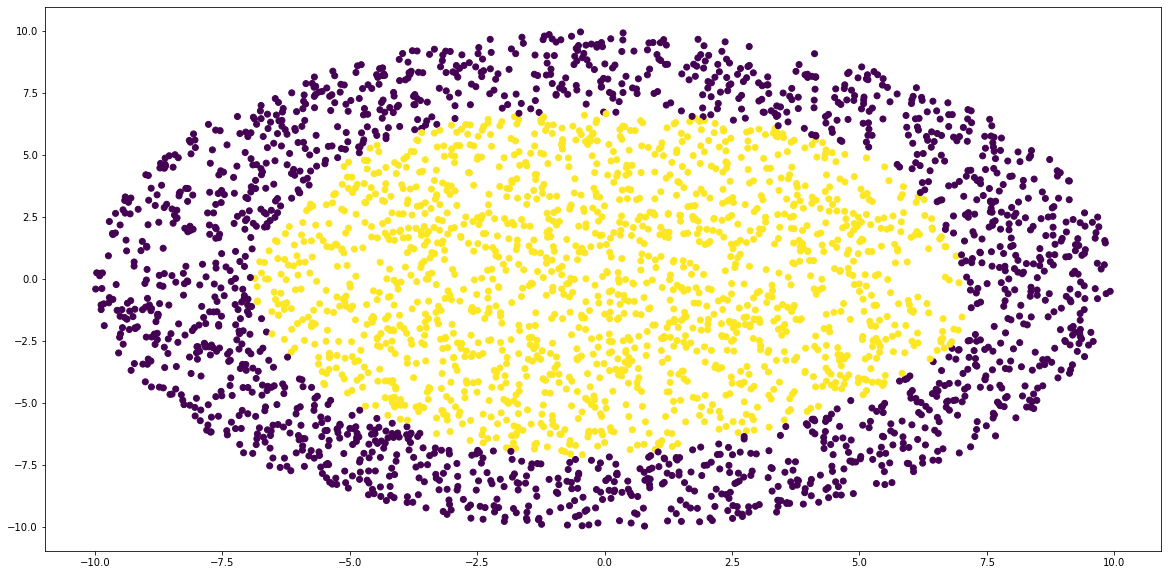

In [124]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_classes)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)